In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import * 

from mlxtend.plotting import plot_decision_regions 

%matplotlib inline

/Users/abulbasar/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/abulbasar/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/abulbasar/anaconda/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be remove

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/abulbasar/data/master/iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

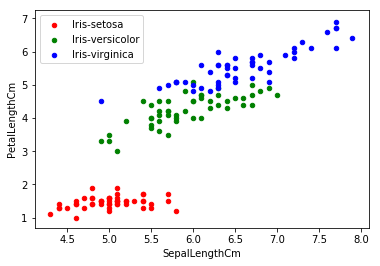

In [6]:
colors = ["red", "green", "blue"]
fig, ax = plt.subplots()
for i, v in enumerate(np.unique(df.Species)):
    df[df.Species == v].plot.scatter(features[0], 
                    features[1], color = colors[i], ax = ax, label = v)
plt.legend()

test accuracy 0.755555555556


Text(0.5,1,'Decision region')

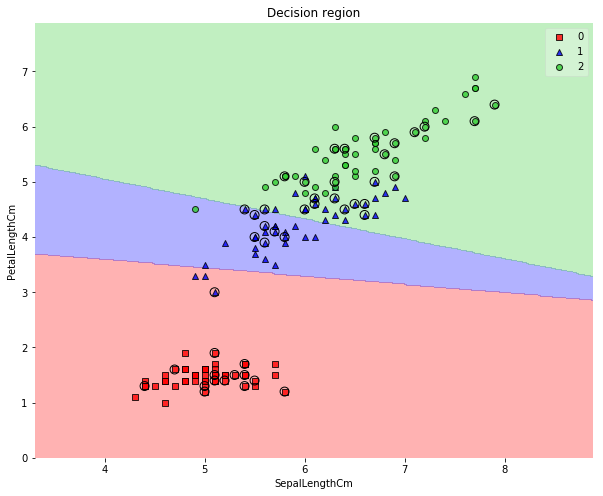

In [12]:
features = ["SepalLengthCm", "PetalLengthCm"]
le = preprocessing.LabelEncoder()
y = le.fit_transform(df.Species)
X = df[features]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state =  1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("lr", linear_model.LogisticRegression())
])
pipe.fit(X_train, y_train)
print("test accuracy", pipe.score(X_test, y_test))

plt.figure(figsize=(10, 8))
plot_decision_regions(X=X.values, y = y, clf=pipe, X_highlight=X_test.values)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title("Decision region")

In [10]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [26]:
result = pd.DataFrame({"actual": y_test, "predict": pipe.predict(X_test)})
result["matched"] = result.actual == result.predict
result.groupby(["actual", "matched"]).agg(len).unstack()

predict      
matched   False True 
actual               
0           NaN  14.0
1          11.0   7.0
2           NaN  13.0

test accuracy 0.933333333333


Text(0.5,1,'Decision region')

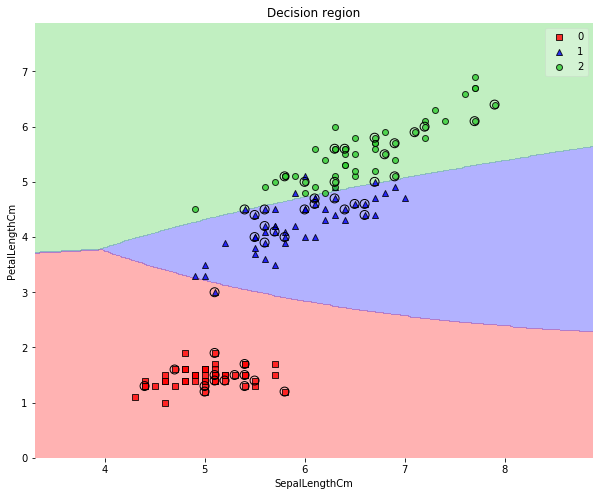

In [27]:
features = ["SepalLengthCm", "PetalLengthCm"]
le = preprocessing.LabelEncoder()
y = le.fit_transform(df.Species)
X = df[features]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state =  1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=3, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("lr", linear_model.LogisticRegression())
])
pipe.fit(X_train, y_train)
print("test accuracy", pipe.score(X_test, y_test))

plt.figure(figsize=(10, 8))
plot_decision_regions(X=X.values, y = y, clf=pipe, X_highlight=X_test.values)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title("Decision region")

In [28]:
result = pd.DataFrame({"actual": y_test, "predict": pipe.predict(X_test)})
result["matched"] = result.actual == result.predict
result.groupby(["actual", "matched"]).agg(len).unstack()

predict      
matched   False True 
actual               
0           NaN  14.0
1           3.0  15.0
2           NaN  13.0

In [30]:
pd.DataFrame(pipe.predict_proba(X_test))

,0,1,2
0,0.846170,0.153567,0.000263
1,0.543268,0.441172,0.015560
2,0.036471,0.816613,0.146917
3,0.859868,0.139566,0.000566
4,0.000036,0.058118,0.941846
5,0.016147,0.581765,0.402088
6,0.003504,0.458577,0.537919
7,0.782898,0.215231,0.001871
8,0.866817,0.130926,0.002257
9,0.000557,0.189089,0.810354


test accuracy 0.977777777778


Text(0.5,1,'Decision region')

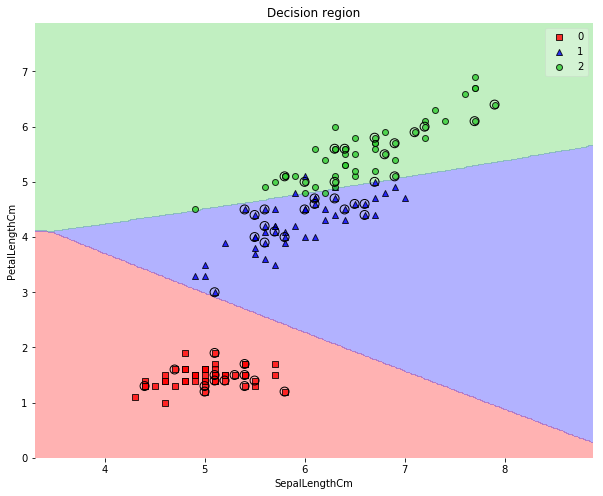

In [36]:
features = ["SepalLengthCm", "PetalLengthCm"]
le = preprocessing.LabelEncoder()
y = le.fit_transform(df.Species)
X = df[features]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state =  1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=3, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("lr", linear_model.LogisticRegression(multi_class="multinomial", 
                            solver="saga", max_iter=1000))
])
pipe.fit(X_train, y_train)
print("test accuracy", pipe.score(X_test, y_test))

plt.figure(figsize=(10, 8))
plot_decision_regions(X=X.values, y = y, clf=pipe, X_highlight=X_test.values)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title("Decision region")

In [37]:
result = pd.DataFrame({"actual": y_test, "predict": pipe.predict(X_test)})
result["matched"] = result.actual == result.predict
result.groupby(["actual", "matched"]).agg(len).unstack()

predict      
matched   False True 
actual               
0           NaN  14.0
1           1.0  17.0
2           NaN  13.0